# Decay time experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scist

### (1) Define decay time experiment

In [2]:
# Assuming given (average) decay time tmean
# generate subsequent decays and count decays in given time window twait

def nDecay(tmean,twait):
    n = 0
    ttot = 0
    while 1 :
        t1 = np.random.exponential(tmean)             # exponential decay time
        ttot += t1
        if ttot > twait :                             # break if next decay already after the end of window
            break
        n+=1
    return n

### (2) Run multiple experiments

In [3]:
# Number of experiments

Ntry = 100

# Mean lifetime

tmean = 1

# Counting time

twait = 10

# Array to collect results, initialized to zeros

Nmax = 30

exp_data = np.zeros(Nmax+1, dtype=int)

# Main experiment loop

for i in  range(Ntry):
    ndec = nDecay(tmean,twait)
    if ndec <= Nmax :
        exp_data[ndec] += 1


### (3) Plot results

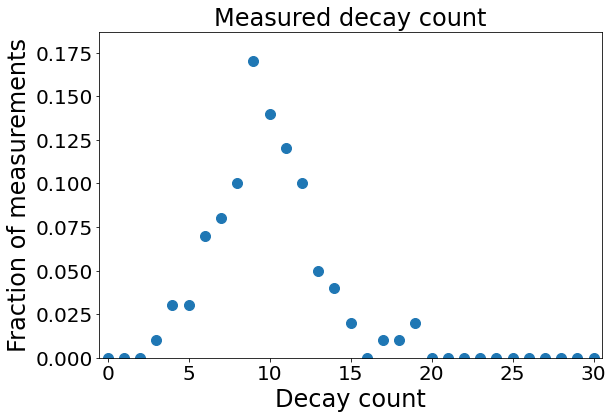

In [4]:
# Plot count vs number

cnt = np.arange(0,Nmax+1,dtype=int)

prob_data = exp_data/Ntry

plt.figure(figsize=(9, 6))

plt.plot(cnt,prob_data,'o',markersize=10)
plt.xlabel('Decay count',size=24)
plt.ylabel('Fraction of measurements',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-0.5,Nmax+0.5])
plt.ylim([0.,1.1*np.max(prob_data)])      # Force lower edge at zero
plt.title("Measured decay count",size=24)

fname = '03_counting_'+str(Ntry)+'.png'
plt.savefig(fname)

plt.show()

### (4) Cpmpare with expected distribution

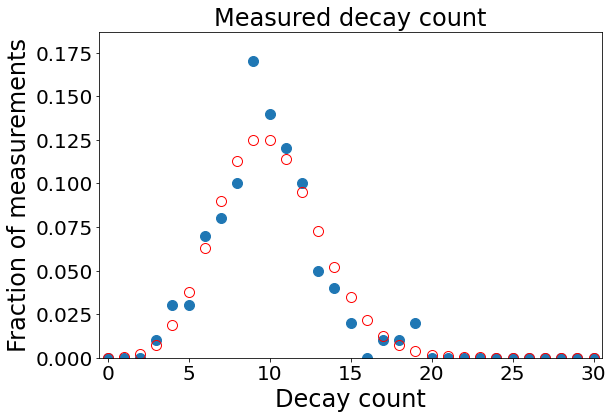

In [5]:
prob_exp = scist.poisson.pmf(cnt,twait/tmean)

plt.figure(figsize=(9, 6))

plt.plot(cnt,prob_data,'o',markersize=10)
plt.plot(cnt,prob_exp,'o',markersize=10,markeredgecolor='red',fillstyle='none')
plt.xlabel('Decay count',size=24)
plt.ylabel('Fraction of measurements',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-0.5,Nmax+0.5])
plt.ylim([0.,1.1*np.max(prob_data)])      # Force lower edge at zero
plt.title("Measured decay count",size=24)

fname = '03_counting2_'+str(Ntry)+'.png'
plt.savefig(fname)

plt.show()